# Breast Cancer Prediction

## Import Libraries And Load Dataset


In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
df = pd.read_csv('data.csv')

## Data Wrangling/Preprocessing

###  Data Exploration and Cleaning
Explored the dataset to understand its structure, feature distribution, and potential insights.

Handled missing values, outliers, or any other data inconsistencies to ensure a clean dataset for analysis.

In [5]:
df.shape

(569, 33)

In [6]:
## Display information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [30]:
## Display rows of the dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


 ### Data Cleaning
 
 Removing the unnecessary column with missing values

In [31]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_wors

In [32]:
# Removing the unnecessary column . Unnamed: 32
if 'Unnamed: 32' in df.columns:
    df = df.drop('Unnamed: 32', axis=1)


print(df.isnull().sum())


id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [33]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [34]:
#counting of instances exist for each unique diagnosis (e.g., malignant or benign).
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

Transform categorical into numerical labels. Here diagnosis

In [35]:
lb=LabelEncoder()
df.iloc[:,1]=lb.fit_transform(df.iloc[:,1].values)

In [36]:
df.head(21)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,844359,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,84458202,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,84501001,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


## Visualisation

Calculate the number of rows and columns needed in the subplot grid. Ensuring a maximum of 6 columns per row.

### Seaborn Histogram Plots

Generate a grid of subplots and use Seaborn to create histogram plots (distplots) for each column in the DataFrame. The histograms display the distribution of numerical values, with 20 bins and kernel density estimation. Each subplot is labeled with the corresponding column name, and the y-axis grid is displayed for clarity.

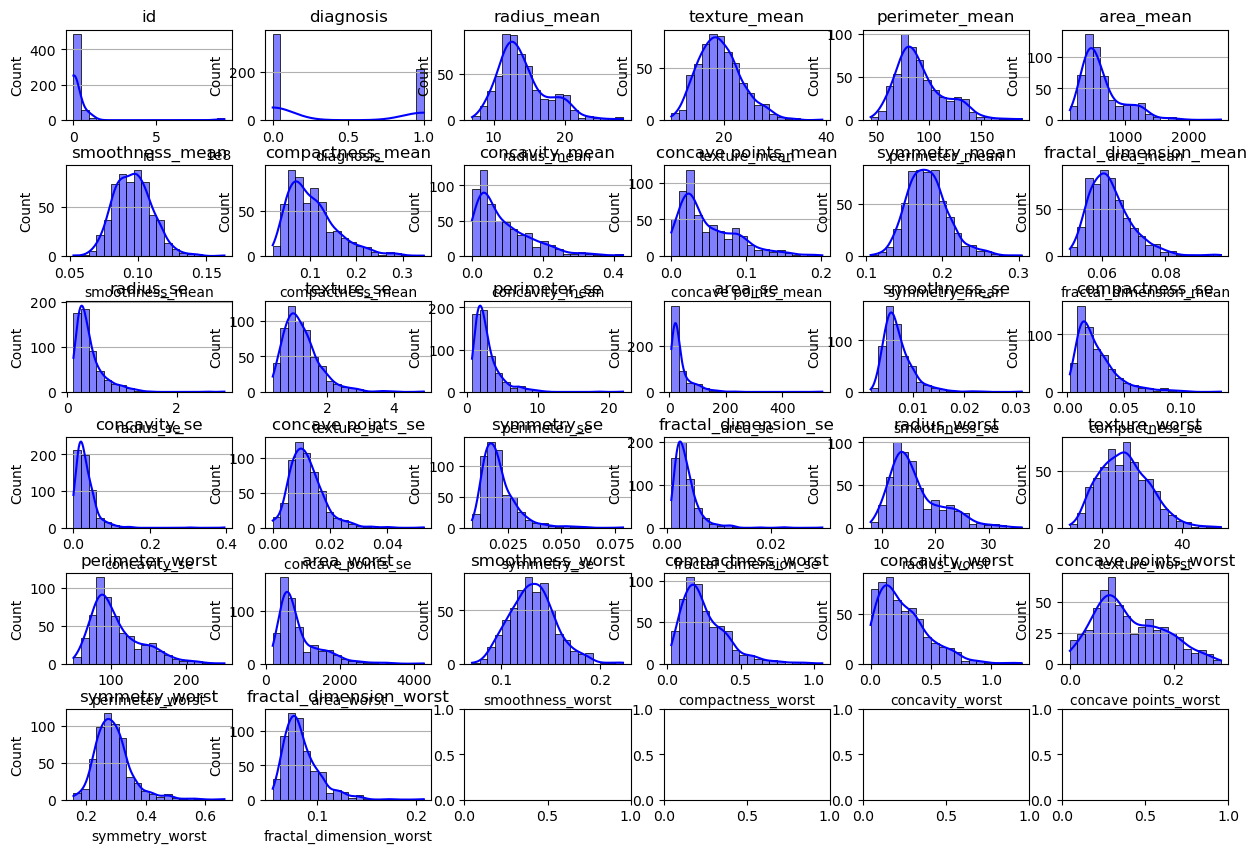

In [14]:

# Determine the number of rows and columns in the subplot grid
num_columns = len(df.columns)
num_rows = (num_columns - 1) // 6 + 1
num_cols = min(num_columns, 6)

# Plot displots for each column using seaborn
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(df.columns):
    row, col = divmod(i, num_cols)
    sns.histplot(df[column], bins=20, kde=True, color='blue', ax=axes[row, col])
    axes[row, col].set_title(column)
    axes[row, col].grid(axis='y')

plt.show()

### Seaborn Box Plots:
Generate a grid of subplots, each containing a Seaborn box plot for a specific column in the DataFrame. The box plots visualize the distribution of numerical values, highlighting key statistics such as quartiles and potential outliers

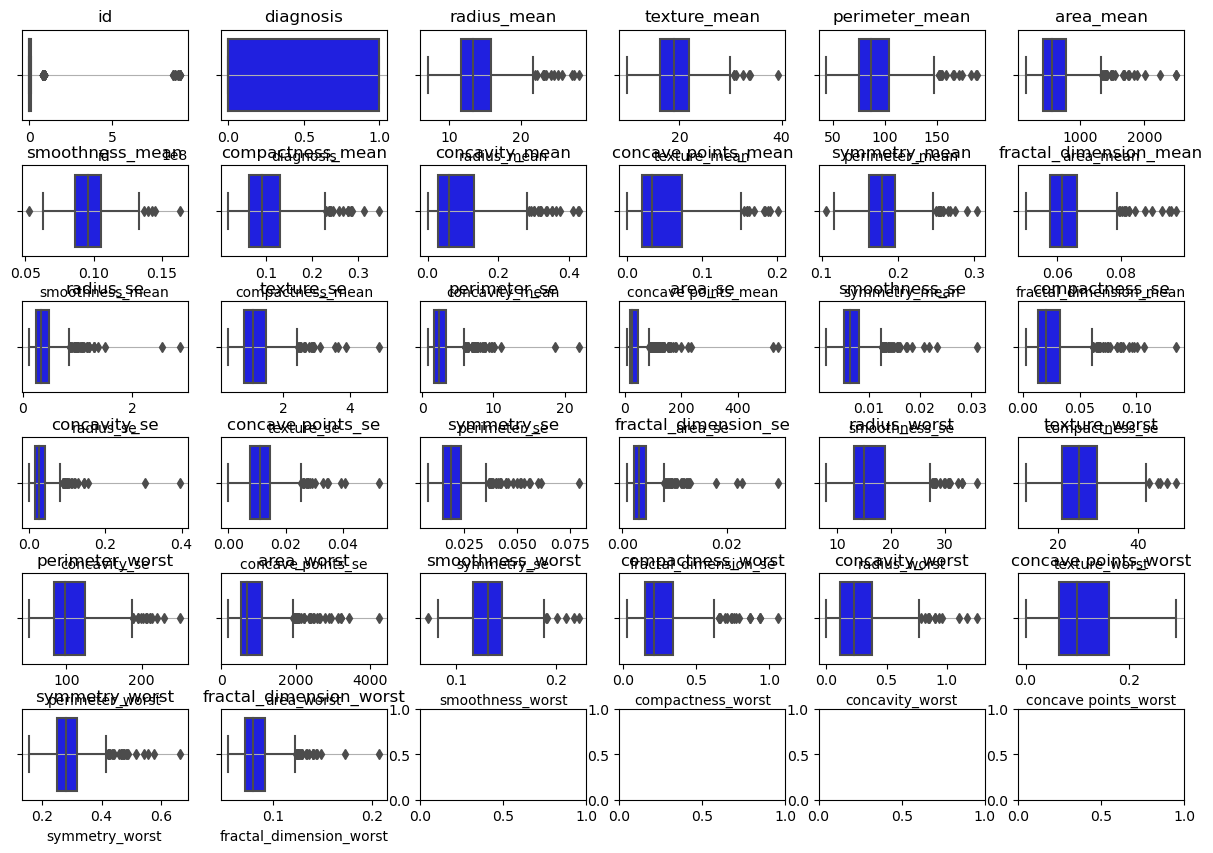

In [16]:

# Determine the number of rows and columns in the subplot grid
num_columns = len(df.columns)
num_rows = (num_columns - 1) // 6 + 1
num_cols = min(num_columns, 6)

# Plot box plots for each column using seaborn
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(df.columns):
    row, col = divmod(i, num_cols)
    sns.boxplot(x=df[column], ax=axes[row, col], color='blue')
    axes[row, col].set_title(column)
    axes[row, col].grid(axis='y')

plt.show()


## Handling Outliers with Interquartile Range method

Using the select_dtypes method to identify numerical columns (integers and floats) in the DataFrame (df) that may contain outliers.

For each identified numerical column with outliers, calculate the first quartile (Q1), third quartile (Q3), and interquartile range (IQR). Determine lower and upper limits for identifying outliers based on a threshold of 1.5 times the IQR.

Identify and replace outliers in each column by setting values outside the determined limits to the median value of the respective column. This approach aims to mitigate the impact of outliers on the dataset while preserving central tendencies.

In [37]:
import numpy as np
import pandas as pd


# Identify numerical columns with outliers
outlier_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Iterate over each outlier column
for outlier_column in outlier_columns:
    # Calculate Q1, Q3, and IQR for the column
    Q1 = df[outlier_column].quantile(0.25)
    Q3 = df[outlier_column].quantile(0.75)
    IQR = Q3 - Q1

    # Identify the lower and upper limits
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Identify outliers based on the limits
    outliers = ((df[outlier_column] < lower_limit) | (df[outlier_column] > upper_limit))

    # Replace outliers with the median value
    df.loc[outliers, outlier_column] = df[outlier_column].median()


### Visualizing Distributions After Outlier Removal

#### Seaborn Histogram Plots

All outliers have been successfully removed from the dataset, as evidenced by the updated distributions displayed in these plots compared to previous visualizations.

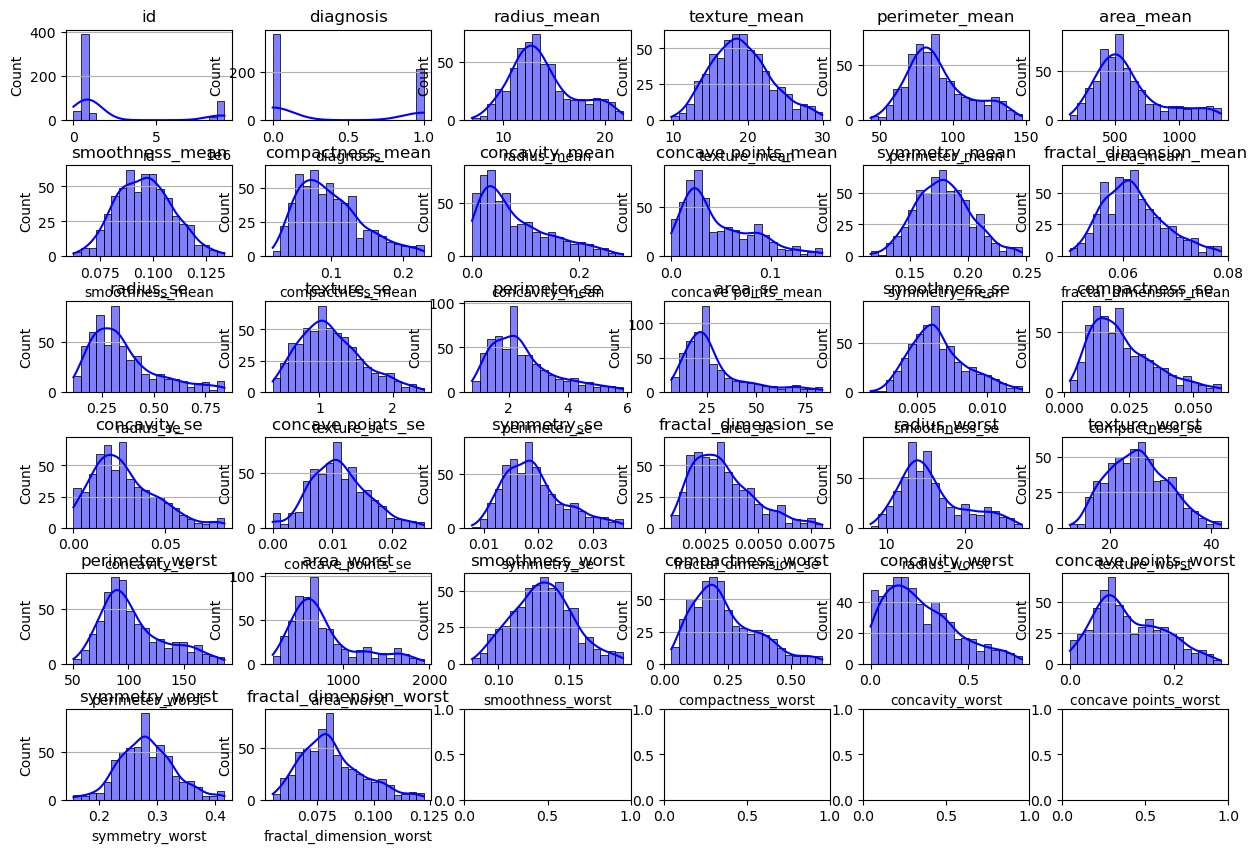

In [22]:

# Determine the number of rows and columns in the subplot grid
num_columns = len(df.columns)
num_rows = (num_columns - 1) // 6 + 1
num_cols = min(num_columns, 6)

# Plot displots for each column using seaborn
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(df.columns):
    row, col = divmod(i, num_cols)
    sns.histplot(df[column], bins=20, kde=True, color='blue', ax=axes[row, col])
    axes[row, col].set_title(column)
    axes[row, col].grid(axis='y')

plt.show()

#### Seaborn Box Plots

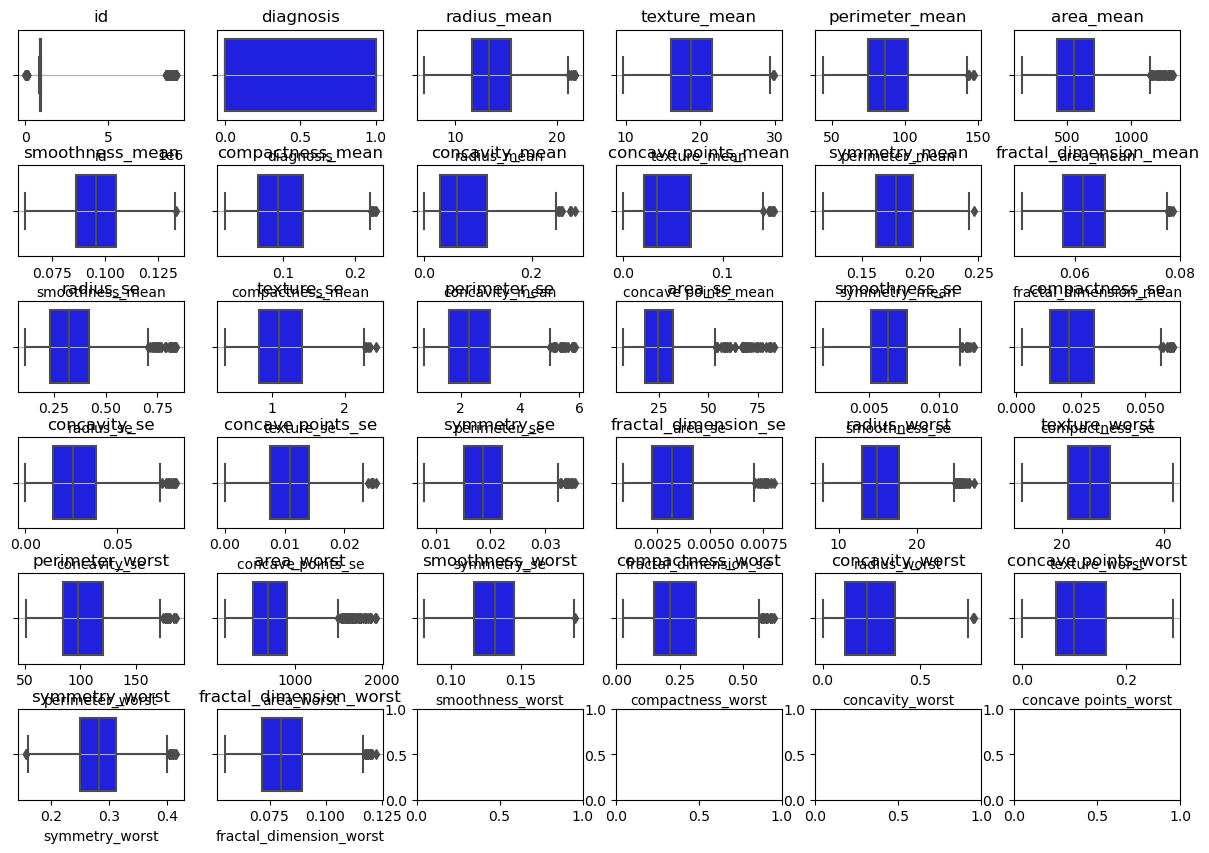

In [23]:
# Determine the number of rows and columns in the subplot grid
num_columns = len(df.columns)
num_rows = (num_columns - 1) // 6 + 1
num_cols = min(num_columns, 6)

# Plot box plots for each column using seaborn
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(df.columns):
    row, col = divmod(i, num_cols)
    sns.boxplot(x=df[column], ax=axes[row, col], color='blue')
    axes[row, col].set_title(column)
    axes[row, col].grid(axis='y')

plt.show()

## Feature Selection

#### Visualization for Diagnosis Patterns
Generating Pairplot:
Creating a pairplot using Seaborn (sns.pairplot) for a subset of columns (columns 1 to 9) from the DataFrame, with hue defined by the 'diagnosis' variable.

Understanding Diagnosis Patterns:
Utilizing the pairplot to visually assess the relationships and patterns among selected features, differentiated by the diagnosis (malignant or benign).

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


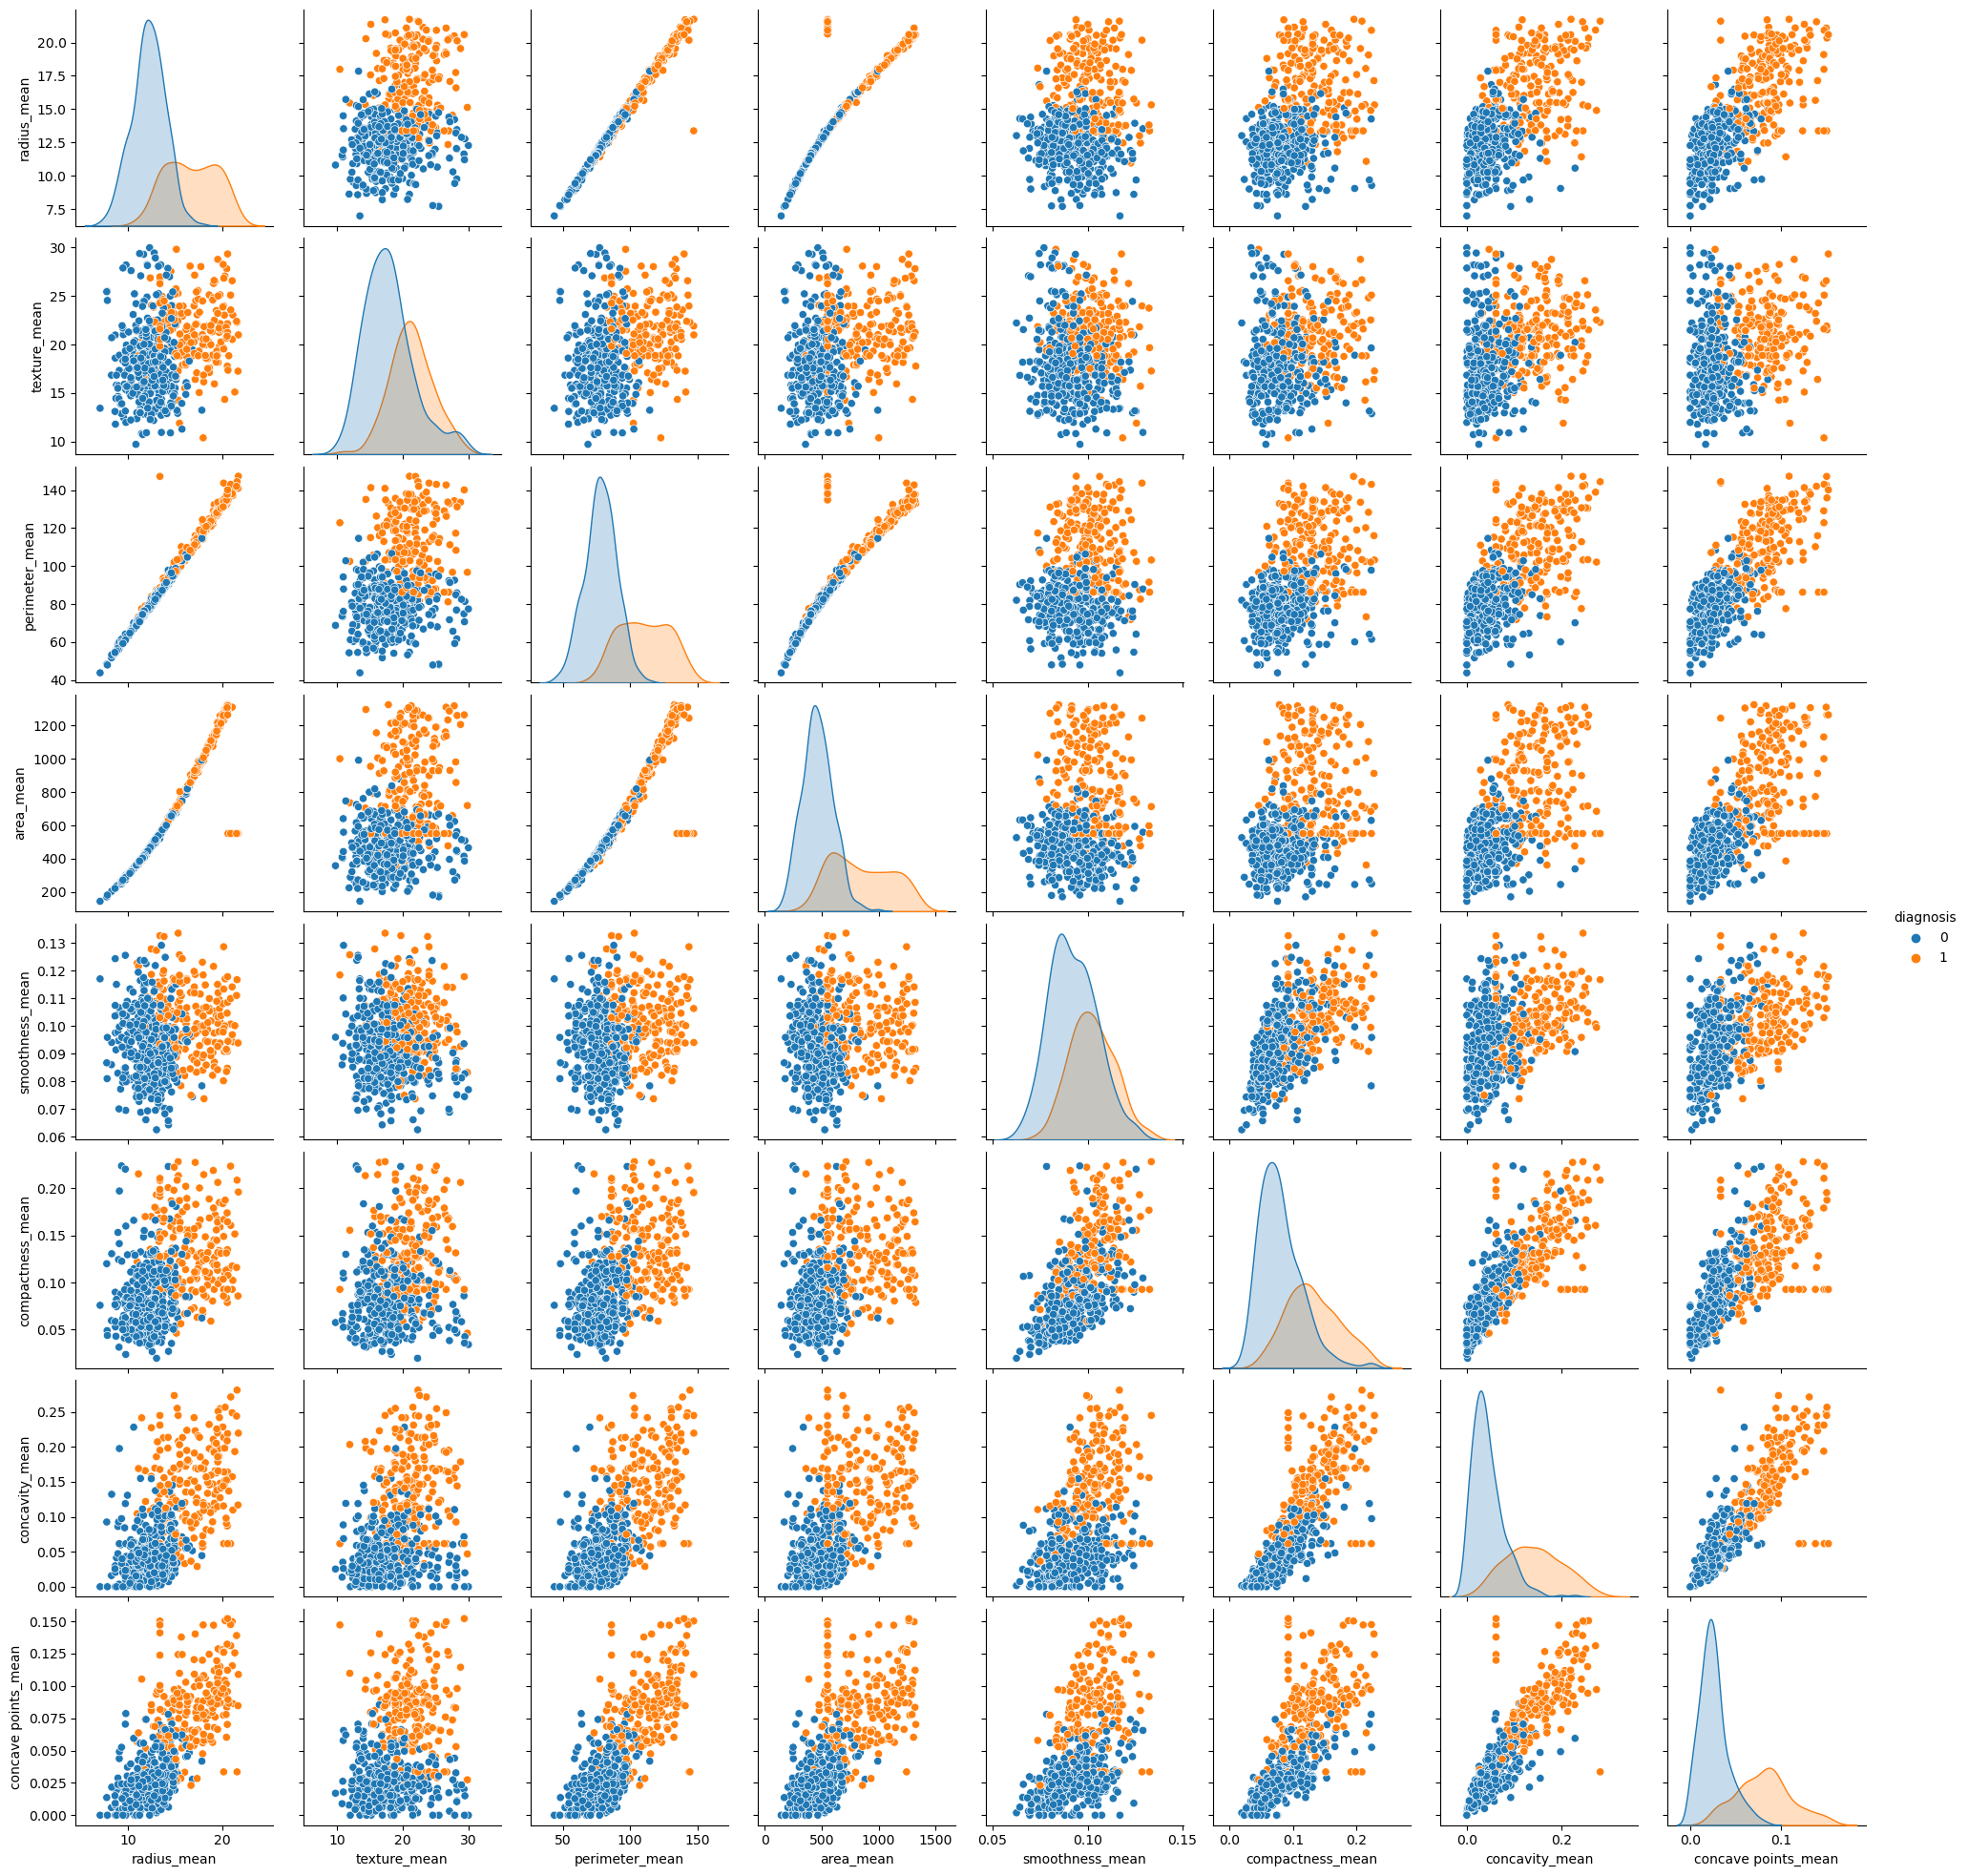

In [38]:
sns.pairplot(df.iloc[:,1:10],hue="diagnosis")

#### Feature Extraction
Extracting the feature matrix X by removing the target variable ('diagnosis') from the original DataFrame df.
Defining the target variable vector y as the 'diagnosis' column.

#### Correlation Analysis
Computing the correlation matrix for all features in the dataset.

Sorting the absolute correlations of each feature with the target variable ('diagnosis') in descending order.

Selecting relevant features by excluding the target variable and considering those with the highest absolute correlations.

In [53]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

correlation_matrix = df.corr()
correlation_with_target = correlation_matrix['diagnosis'].abs().sort_values(ascending=False)
relevant_features_corr = correlation_with_target[1:]  # Exclude the target variable

selected_features = list(relevant_features_corr.index)

# Display the selected features
print("Selected Features:", selected_features)


Selected Features: ['concave points_worst', 'perimeter_worst', 'concave points_mean', 'radius_worst', 'perimeter_mean', 'concavity_mean', 'area_worst', 'radius_mean', 'area_mean', 'concavity_worst', 'compactness_worst', 'compactness_mean', 'area_se', 'radius_se', 'perimeter_se', 'concave points_se', 'concavity_se', 'texture_worst', 'smoothness_worst', 'texture_mean', 'smoothness_mean', 'compactness_se', 'symmetry_worst', 'symmetry_mean', 'fractal_dimension_worst', 'fractal_dimension_se', 'symmetry_se', 'id', 'texture_se', 'smoothness_se', 'fractal_dimension_mean']


In [124]:
#checking the null values 
print(X.isnull().sum())

radius_mean                   0
texture_mean                  0
perimeter_mean                0
area_mean                     0
smoothness_mean               0
compactness_mean              0
concavity_mean                0
concave points_mean           0
symmetry_mean                 0
fractal_dimension_mean        0
radius_se                     0
texture_se                    0
perimeter_se                  0
area_se                       0
smoothness_se                 0
compactness_se                0
concavity_se                  0
concave points_se             0
symmetry_se                   0
fractal_dimension_se          0
radius_worst                  0
texture_worst                 0
perimeter_worst               0
area_worst                    0
smoothness_worst              0
compactness_worst             0
concavity_worst               0
concave points_worst          0
symmetry_worst                0
fractal_dimension_worst       0
mean_area_radius_ratio        0
texture_

In [125]:
#printing the columns 
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

#### Creating new features
Introducing new features such as the 'mean_area_radius_ratio,' 'texture_smoothness_ratio,' 'log_compactness_mean,' 'area_texture_ratio,' and 'compactness_symmetry_ratio' based on meaningful combinations of existing features.

**Dataset Splitting**

Splitting the original dataset into training and testing sets (80% training, 20% testing) to evaluate the model's performance.

**Feature Scaling**

Standardizing the feature values using StandardScaler to ensure all features are on a similar scale. This step is crucial for certain machine learning algorithms that are sensitive to the scale of input features.

In [127]:
column_names = ["id", "diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean", "smoothness_mean",
                "compactness_mean", "concavity_mean", "concave_points_mean", "symmetry_mean", "fractal_dimension_mean",
                "radius_se", "texture_se", "perimeter_se", "area_se", "smoothness_se", "compactness_se", "concavity_se",
                "concave_points_se", "symmetry_se", "fractal_dimension_se", "radius_worst", "texture_worst",
                "perimeter_worst", "area_worst", "smoothness_worst", "compactness_worst", "concavity_worst",
                "concave_points_worst", "symmetry_worst", "fractal_dimension_worst"]

# Assume 'diagnosis' is the target variable
X = df.drop(['id', 'diagnosis'], axis=1)
y = df['diagnosis']

# Feature Engineering: Creating new features
X['mean_area_radius_ratio'] = X['area_mean'] / X['radius_mean']
X['texture_smoothness_ratio'] = X['texture_mean'] / X['smoothness_mean']
X['log_compactness_mean'] = np.log1p(X['compactness_mean'])
X['area_texture_ratio'] = X['area_mean'] / X['texture_mean']
X['compactness_symmetry_ratio'] = X['compactness_mean'] / X['symmetry_mean']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



### Support Vector Machine (SVM) Model Training and Evaluation
**SVM Model Creation**
Creating a Support Vector Machine (SVM) model using the SVC (Support Vector Classification) class with a random state for reproducibility.
Model Training:

**Fitting the Model**
Training the SVM model using the scaled training data (X_train_scaled and y_train) to learn the underlying patterns in the data.
Model Evaluation:

**Predictions and Accuracy**
Making predictions on the scaled test set (X_test_scaled) and assessing the model's performance using the accuracy metric.
Printing the accuracy score to quantify how well the SVM model generalizes to unseen data.

In [128]:
# Create an SVM model
svm_model = SVC(random_state=42)

# Train the SVM model
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f'SVM Model Accuracy: {accuracy_svm}')


SVM Model Accuracy: 0.9736842105263158


#### SVM Model Classification Report
Generating a comprehensive classification report using the classification_report function. 

**Metrics Included**
Precision: Ability of the classifier not to label as positive a sample that is negative.

Recall: Ability of the classifier to find all the positive samples.
F1-score: Harmonic mean of precision and recall, providing a balance between the two metrics.

Support: Number of actual occurrences of the class in the specified dataset.


In [131]:
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))

Classification Report:
              precision    recall  f1-score   support

           B       0.97      0.99      0.98        71
           M       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



#### SVM Model Confusion Matrix

Computing and displaying the confusion matrix using the confusion_matrix function. The confusion matrix summarizes the model's predictions in terms of true positive, true negative, false positive, and false negative instances.

In [132]:

# Confusion Matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(conf_matrix_svm)

Confusion Matrix:
[[70  1]
 [ 2 41]]
